In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

## Data Scraping

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30 #30
page_size = 100 #100

reviews = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.text
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Get the reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    # Get the review stats table
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        
        # Get the review value
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        # Get the review star
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
#         print(rating)
        
        rating.append(recomend)
        
        # Get the category for the values and stars
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
        
        
#         print(category)

        # Build the dataframe from the dictionary.
        # Data dictionary for each review
        data_dict = pd.DataFrame([rating], columns=category)
        
        # The dataframe
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
                                                                 
        # Clear the rating and category for each review
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews
df.head()

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
0,A380,Business,Business Class,Washington to London,June 2023,3.0,3.0,3.0,3.0,1.0,1,no,NaN,✅ Trip Verified | Original flight was cancell...
1,A321,Couple Leisure,Economy Class,London Heathrow to Naples,June 2023,1.0,4.0,1.0,NaN,2.0,2,no,NaN,Not Verified | Airport check in was functiona...
2,A320,Solo Leisure,Economy Class,Berlin to London,July 2023,5.0,5.0,3.0,NaN,4.0,5,yes,5.0,✅ Trip Verified | Flight fine. In-line with c...
3,NaN,Family Leisure,Economy Class,Glasgow to London,June 2023,1.0,1.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | Came from Glasgow to London...
4,NaN,Solo Leisure,Economy Class,Dubai to Keflavik via London,May 2023,1.0,1.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | My flight on on 12 May 2023...


## Data Cleaning

In [3]:
# Clean the review column
remove_text = ['✅ Trip Verified |', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

##  Data Analysis

In [4]:
# Convert all reviews to a single string
review_word = []

for i in df['reviews'] :
    a = i.split(" ")
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

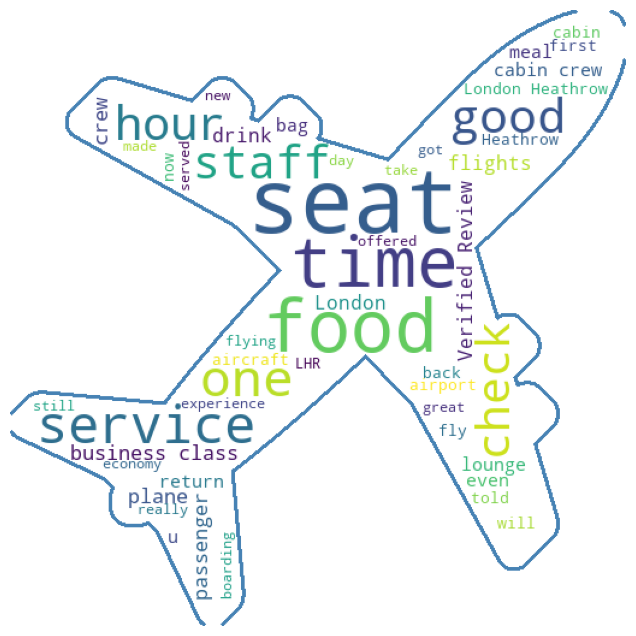

In [5]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
airplane_mask = np.array(Image.open(path.join(d, "/kaggle/input/airplane-picture/airplane-icon-22.jpg")))

# Define stopwords
stopwords = set(STOPWORDS)
additional_stopwords = {"Flight","BA", "British Airway", "British", "Airway", "Airways", "airline"}
stopwords = stopwords | additional_stopwords


wc = WordCloud(background_color="white", max_words=50, mask=airplane_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue').generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

Overal, on the wordcloud, the reviews from customers were mainly about these topics: seat, class, service, and especially Gatwick Airport

## Understanding the dissatisfaction of customers

### Proportion of customer recommendation

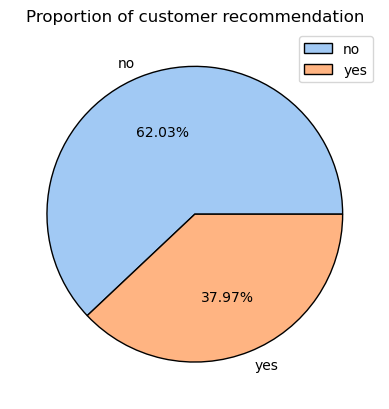

In [6]:
prop_by_rec = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(prop_by_rec['reviews'], labels = prop_by_rec['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.title("Proportion of customer recommendation")
plt.legend()
plt.show()

British Airways is dealing with the challenge that more than 62% of the customers would not recommend the airline

## Find out what they say when they do not recommend

### Overal score for review stats of customers who say no

In [7]:
no_df = df[df["Recommended"] == "no"]
no_df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity
count,1758.000000,1748.000000,1548.000000,1156.000000,1730.000000,1861.000000,414.000000
mean,2.124005,2.447941,1.813307,2.048443,2.115029,1.695862,1.454106
std,1.094553,1.290240,0.996778,1.147664,1.213027,0.891374,0.908166
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
75%,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The mean scores for Food & Beverages, Value for Money, Wifi & Connectivity are well below average.

### Analyse Food & Beverages

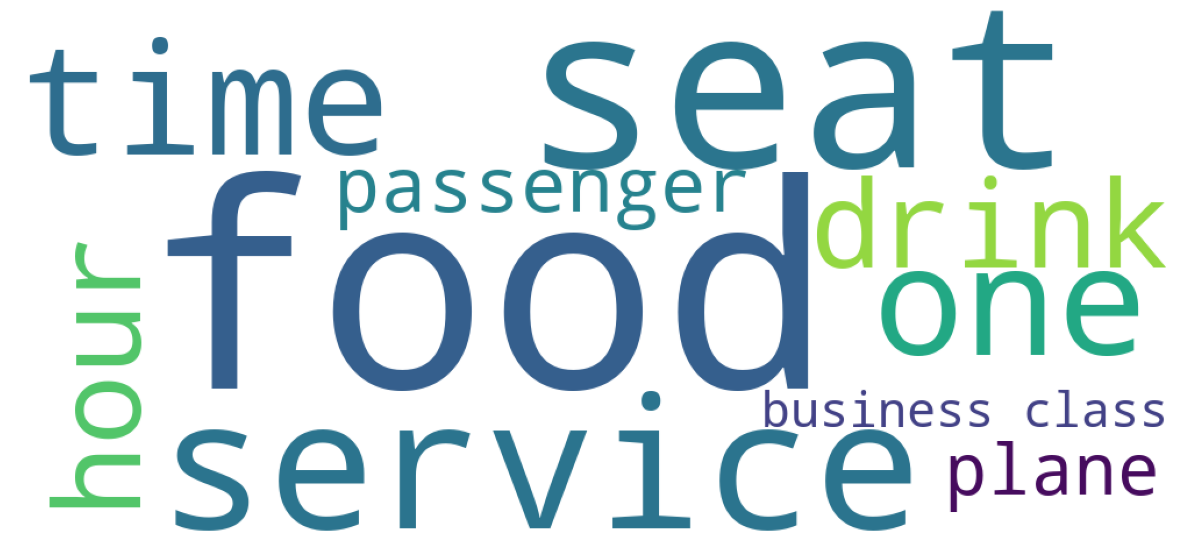

In [8]:
df_food = no_df[no_df["reviews"].str.contains("food | drink | beverages")]
df_food_below = df_food[df_food["Food & Beverages"] <= 2.5] 
review_word = []

for i in df_food_below["reviews"] :
    a = i.split(" ")
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

additional_stopwords = {"Flight","BA", "British Airway", "British", "Airway", "Airways", "airline"}
stopwords = stopwords | additional_stopwords
wc = WordCloud(width = 1000, height = 450, background_color = 'white', stopwords = stopwords, max_words = 10).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

It is recommended that the problem with food and drinks is about time and service

### Analyse Value for money

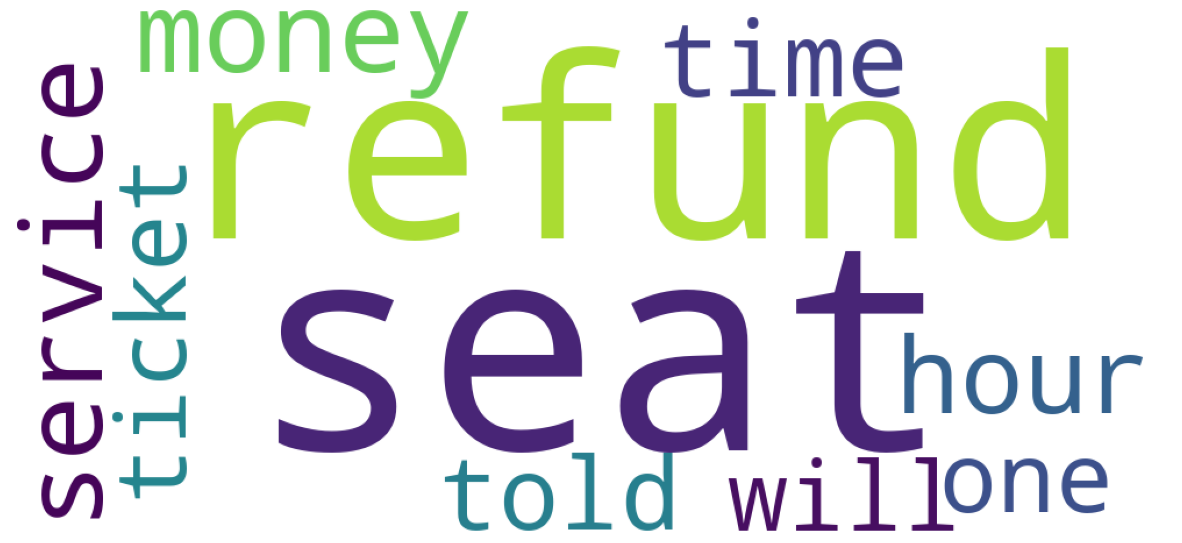

In [9]:
df_value = no_df[no_df["reviews"].str.contains("money | refund ")]
df_value_below = df_value[df_value["Value For Money"] <= 2.5] 
review_word = []

for i in df_value_below["reviews"] :
    a = i.split(" ")
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

additional_stopwords = {"Flight","BA", "British Airway", "British", "Airway", "Airways", "airline"}
stopwords = stopwords | additional_stopwords
wc = WordCloud(width = 1000, height = 450, background_color = 'white', stopwords = stopwords, max_words = 10).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

The customers having low score for Value of Money experienced issues related to meals and Gatwick airport.

#### Further look at Gatwick Airport

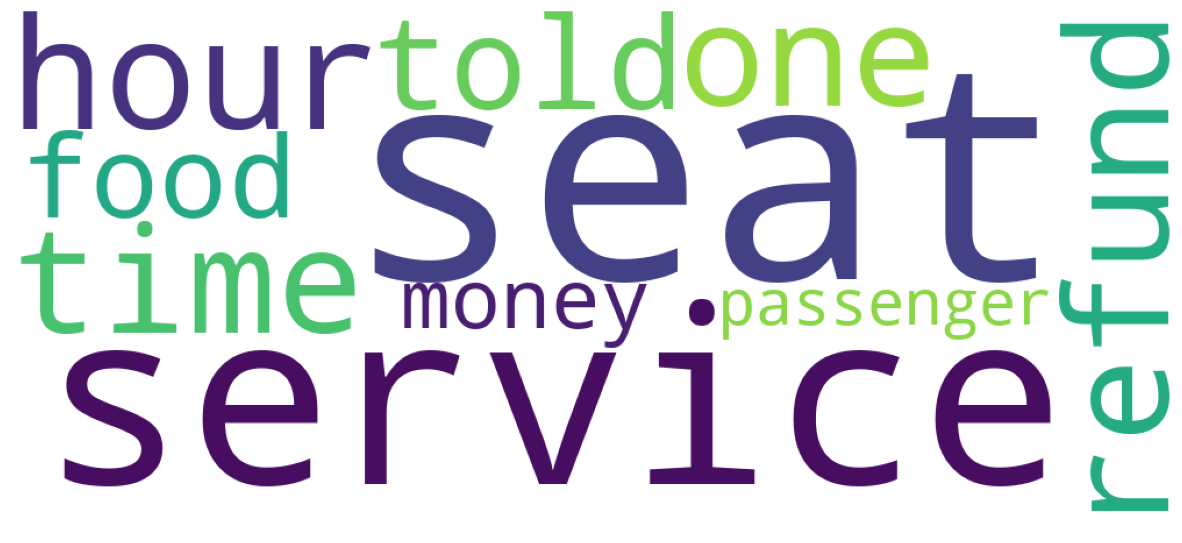

In [10]:
df_value = no_df[no_df["reviews"].str.contains("money | refund |Gatwick")]
df_value_below = df_value[df_value["Value For Money"] <= 2.5] 
review_word = []

for i in df_value_below["reviews"] :
    a = i.split(" ")
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

additional_stopwords = {"Flight","BA", "British Airway", "British", "Airway", "Airways", "airline"}
stopwords = stopwords | additional_stopwords
wc = WordCloud(width = 1000, height = 450, background_color = 'white', stopwords = stopwords, max_words = 10).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

However, when analyzing data at Gatwick Airport individually, there is no concerns about the meals. Therefore, the issues and meals and Gatwick Airport should be investigated seperately

### Analyse Wifi and Connectivity

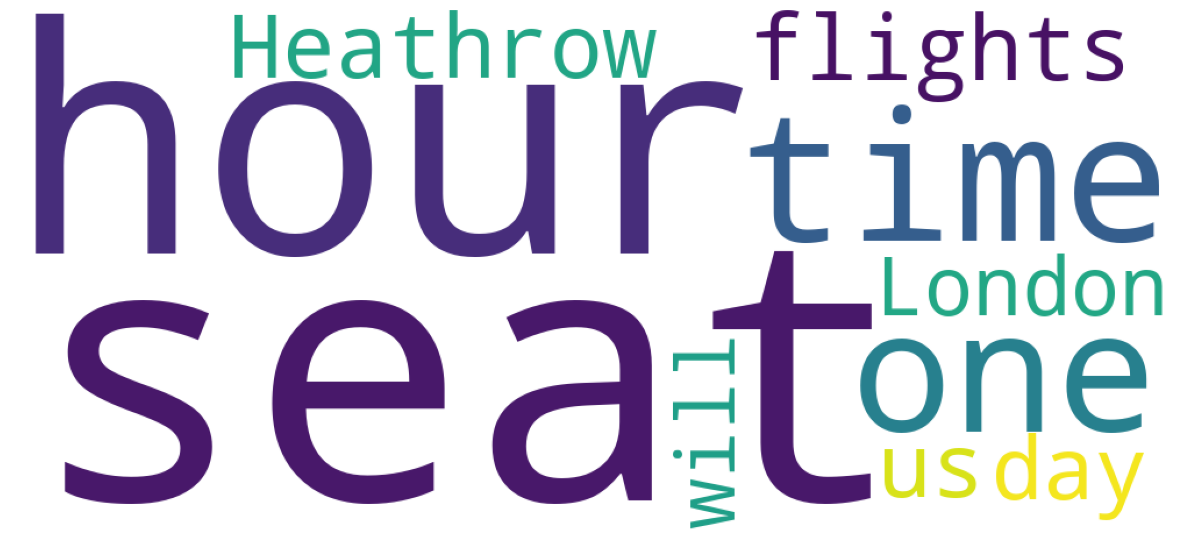

In [11]:
df_wifi = no_df[no_df["reviews"].str.contains("wifi | connect")]
df_wifi_below = df_wifi[df_wifi["Wifi & Connectivity"] <= 2.5] 
review_word = []

for i in df_wifi_below["reviews"] :
    a = i.split(" ")
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

additional_stopwords = {"Flight","BA", "British Airway", "British", "Airway", "Airways", "airline"}
stopwords = stopwords | additional_stopwords
wc = WordCloud(width = 1000, height = 450, background_color = 'white', stopwords = stopwords, max_words = 10).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

It is possible that the customers on flights from/ to Heathrow, Londow experienced Wifi and Connectivity issues